# Part 1 - Business problem

Company MailNet Service is experiencing an increase in spam volume, resulting in customer complaints and a drop in user satisfaction. The company wants to implement an automated spam prediction system to filter these emails with high accuracy, using machine learning techniques to improve the user experience and reduce the amount of spam in the inbox.

**Workflow**

- Data Collection: Obtaining a large set of labeled emails.

Data Exploration and Cleansing: Exploratory analysis and data preparation.

**Feature Extraction** 

- Transformation of textual data into usable features.

**Model Training** 

- Training different models and selecting the best one.

**Validation and Testing** 

- Assessment of model performance and necessary adjustments.

**Implementation** 

- Deploy the model in production.

**Monitoring and Maintenance** 

- Performance monitoring and regular updates.

## Conclusion

Spam prediction is a critical problem for email services, and implementing an effective machine learning model can significantly improve the user experience. The key to success is utilizing a large volume of labeled data, carefully selecting features, and continually maintaining the model to handle new spam tactics.

In [21]:
# Library System libraries
import re
import os
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np 
import pandas

# Library data visualization
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
from IPython.display import SVG

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

Python version in this Jupyter Notebook: 3.12.7


# Part 2 - Database

In [22]:
# Database
df_train = pd.read_csv("mail_data.csv")

In [23]:
# Viewing first 5 data
df_train.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
# Viewing 5 latest data
df_train.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [25]:
# Info data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [26]:
# Type dados
df_train.dtypes

Category    object
Message     object
dtype: object

In [27]:
# Checking the target column
df_train.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

# Part 3 - Preprocessing

In [28]:
# Type data
df_train.dtypes

Category    object
Message     object
dtype: object

In [29]:
# Check missing values
df_train.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
# Remove rows with missing values
df_train.dropna(inplace=True)

In [31]:
# Check distribution of categories
df_train['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [32]:
# Importing label encoder library
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df_train['target'] = label_encoder.fit_transform(df_train['Category'])


In [33]:
# View the first DataFrame records after encoding
# Viewing dataset
df_train.head()

,Category,Message,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [34]:
import nltk

nltk.download('wordnet', download_dir='/usr/share/nltk_data')
nltk.download('omw-1.4', download_dir='/usr/share/nltk_data')
nltk.download('stopwords', download_dir='/usr/share/nltk_data')

# Check the directory contents to confirm the download
print(os.listdir('/usr/share/nltk_data/corpora/'))

['omw-1.4.zip', 'stopwords', 'stopwords.zip', 'wordnet', 'wordnet.zip']


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
import nltk
import string
import zipfile
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import urllib.request

# URL to the wordnet corpus
url = 'https://github.com/nltk/nltk_data/raw/gh-pages/packages/corpora/wordnet.zip'

# Download the zip file
urllib.request.urlretrieve(url, 'wordnet.zip')

# Extract the contents to the NLTK data directory
with zipfile.ZipFile('wordnet.zip', 'r') as zip_ref:
    zip_ref.extractall('/usr/share/nltk_data/corpora/')

In [36]:
import nltk
import string
import zipfile
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import urllib.request
import os
import re

# Ensure 'punkt_tab' is downloaded
nltk.download('punkt_tab', download_dir='/usr/share/nltk_data')

# Set custom path for NLTK data
nltk.data.path.append('/usr/share/nltk_data')

# Preprocessing function
def preprocess_text(text):
    # Remove HTML entities
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Merge tokens back into a single text
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Assuming your dataframe is called df and the text column is called 'text'
df_train['Message_1'] = df_train['Message'].apply(preprocess_text)

# Viewing
df_train.head()

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Category,Message,target,Message_1
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah dont think go usf life around though


# Part 4 - Data analysis

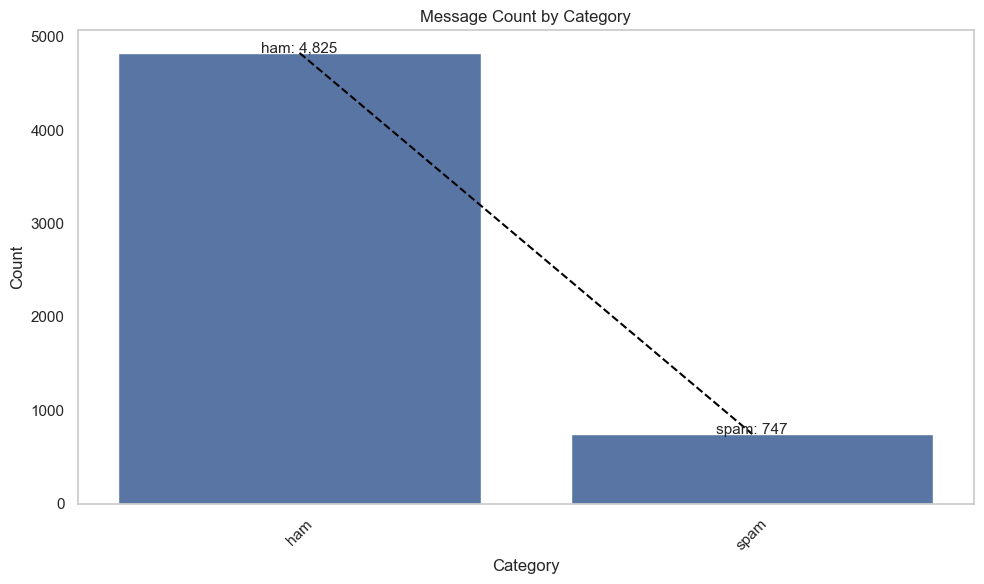

In [37]:
# Calculate counts by category
total_counts = df_train['Category'].value_counts()

# Sort the categories by total (from largest to smallest)
total_counts_sorted = total_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6)) # Adjust size as needed
ax = sns.countplot(x='Category', data=df_train, orient='v', order=total_counts_sorted.index)

# Add total above each bar
for i, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width()/2., p.get_height() + 0.2, f'{total_counts_sorted.index[i]}: {total_counts_sorted[i]:,}', ha= "center", fontsize=11)

# Add dotted line from largest to smallest
for i in range(len(total_counts_sorted) - 1):
    height_curr = ax.patches[i].get_height()
    height_next = ax.patches[i + 1].get_height()
    ax.plot([i, i + 1], [height_curr, height_next], linestyle='--', color='black')

plt.title('Message Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

Here we can observe a bar graph that shows the distribution of the target variable between the 'ham' and 'spam' classes. With a total of 747 observations, this graph allows us to evaluate the importance of ensuring that classes are balanced or not. Distribution analysis is crucial to understanding the quality and representativeness of our dataset, which directly impacts the performance of classification models.

Note: you may need to restart the kernel to use updated packages.


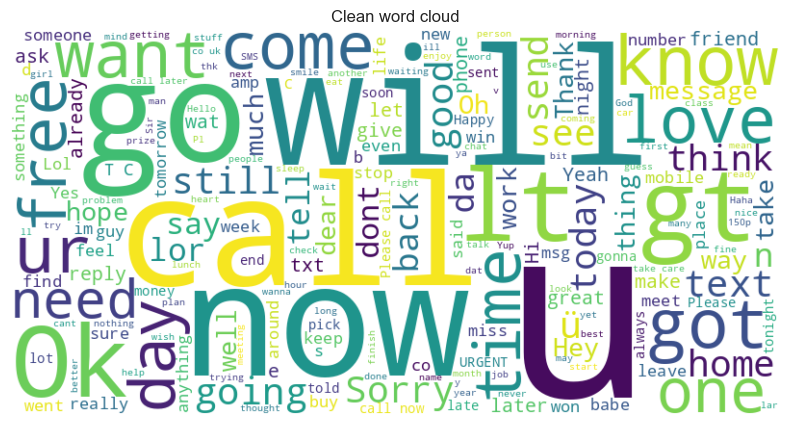

In [38]:
# Install the wordcloud package
%pip install wordcloud

# Importing library
from wordcloud import WordCloud

# Concatenate all messages into a single text
all_text = ' '.join(df_train['Message'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.title("Clean word cloud")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Here we can observe the word cloud generated after data preprocessing. This chart visualizes the most frequent words in our dataset, highlighting important terms like 'spam' and other keywords related to identifying unwanted messages.

Pre-processing involved several essential steps:

Stopwords Removal: Common words that do not significantly contribute to the meaning of the text, such as 'and', 'a', 'of', have been removed.

Normalization: Processes such as converting all words to lowercase and removing punctuations were applied to standardize the text.

Tokenization: Text has been broken down into individual tokens or words to facilitate analysis.

Lemmatization/Stemming: Words were reduced to their base or stem forms to group similar terms together.

The resulting word cloud offers a clear and concise visualization of the most relevant terms, making it easier to identify patterns and understand the main themes present in messages. This is crucial for improving the effectiveness of text classification models and for overall data content analysis.

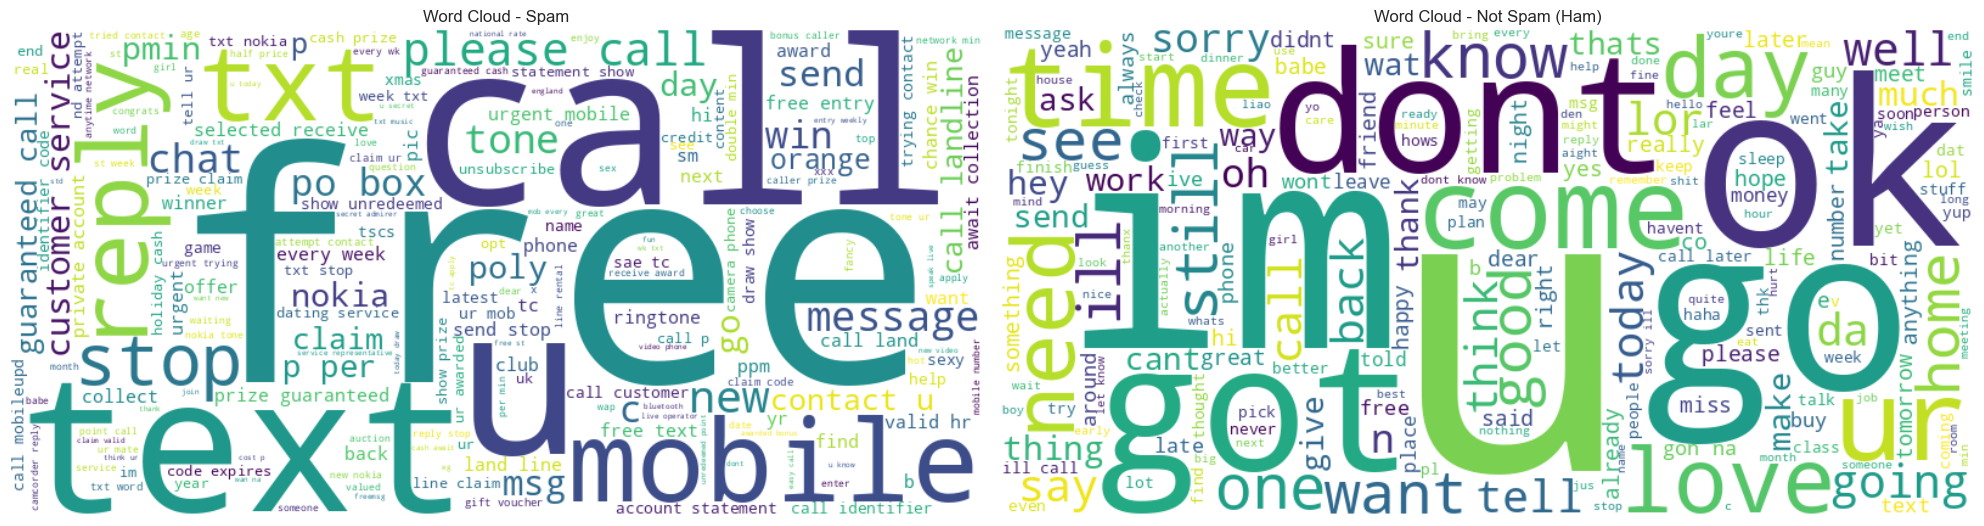

In [39]:
# Filter messages by category
spam_messages = df_train[df_train['Category'] == 'spam']['Message']
ham_messages = df_train[df_train['Category'] == 'ham']['Message']

# Preprocess text for each category
processed_spam_messages = ' '.join(spam_messages.apply(preprocess_text))
processed_ham_messages = ' '.join(ham_messages.apply(preprocess_text))

# Generate word cloud for Spam
wordcloud_spam = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(processed_spam_messages)

# Generate word cloud for No Spam (Ham)
wordcloud_ham = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(processed_ham_messages)

# Plot word clouds
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Word Cloud - Spam')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Word Cloud - Not Spam (Ham)')
plt.axis('off')

plt.tight_layout()
plt.show()

The word cloud graph represents the frequency of words in two types of messages: 'Spam' and 'Ham' (not spam). The view is divided into two sections.

**Word Cloud - Spam**

- The most prominent and frequent words are "free", "mobile", "claim", "win", "txt", "call", "guaranteed", "prize", "text", "msg", "stop" .

- These words are indicative of typical spam messages, which often promote prize offers, free products, or requests to call or text certain numbers.

- The use of words such as "free", "win" and "prize" suggests attempts to lure the recipient with promises of rewards, a common tactic in spam messages.

**Word Cloud - Ham (Not Spam)**

- The most prominent and frequent words are "u", "im", "go", "love", "good", "day", "ok", "want", "got", "time".

- These words indicate a more personal and everyday communication. Words like "love", "good", "day", "want" are common in conversations between friends or family.

- The presence of words like "u" and "im" suggests informal, abbreviated language typical of personal text messages.

**General Analysis**

**Word Frequency and Size**

- The size of the words in the cloud indicates their frequency. Larger words appear more frequently in the dataset.

**Comparison between Spam and Ham**

- Spam messages tend to use words related to offers, prizes and calls to action, trying to persuade the recipient to take some action.

- Non-spam (ham) messages contain words more related to social and personal interactions, reflecting more genuine and less intrusive communication.

**Importance for Data Analysis**

**Pattern Detection**

The word cloud helps you identify patterns in spam and non-spam messages. This information can be used to train machine learning models to automatically classify messages as spam or non-spam.

**Pre-processing and Data Cleansing**

Visualization also helps you understand the effectiveness of preprocessing. Common and irrelevant words were removed, leaving only meaningful terms that contribute to the analysis.

# Part 5 - Division and training

In [40]:
# Resources
x = df_train["Message_1"]

# Target variable
y = df_train["target"]

**Resources (x)**

x represents the independent variable or set of features that will be used to train the machine learning model.
x is assigned to the "Message_1" column of the df_train dataframe.
In this column, presumably each entry contains a text message that we want to classify as spam or not spam.
In other words, x contains the text of the messages that the model will use as input to make predictions.

**Target Variable (y)**

y represents the dependent variable or target variable that the machine learning model will try to predict.
y is assigned to the "target" column of the df_train dataframe.
In this column, each entry contains the corresponding message class, usually 0 or 1, where 0 can represent 'ham' (not spam) and 1 can represent 'spam'.
In other words, y contains the labels or categories that indicate whether a message is spam or not.
Context in Data Analysis and Machine Learning:

**Feature Division and Target Variable**

Splitting data into x and y is a common practice in machine learning. x contains the inputs that the model will use to learn, while y contains the expected outputs that the model will try to predict.
This separation is crucial for supervised training, where the model learns from labeled examples (x as input and y as output).

# Part 6 - Model Training

In [41]:
# Importing tfidf library
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating an object
vectorizer = TfidfVectorizer()

# Training
x = vectorizer.fit_transform(df_train['Message_1'])

# Applying text vectorization
y = df_train['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [42]:
# Importing library
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
# Step 3: Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Viewing rows and columns
print("Viewing X_train rows and columns", X_train.shape)

# Viewing rows and columns
print("Viewing rows and columns y_train", y_train.shape)

Viewing X_train rows and columns (4457, 7937)
Viewing rows and columns y_train (4457,)


- Here, we conducted the training of the model using a train-test split. We adopted an 80/20 division, where 80% of the data was used for training and the remaining 20% was reserved for testing. This procedure is crucial for accurately evaluating the model's performance. The training set allows the model to learn patterns and relationships within the data, while the test set, which the model has not seen during training, is used to validate its ability to generali.ze and predict new data. Additionally, this approach helps identify and mitigate issues such as overfitting, ensuring that the model not only memorizes the training data but also performs well on unseen data.

# Part 7 - Machine learning model

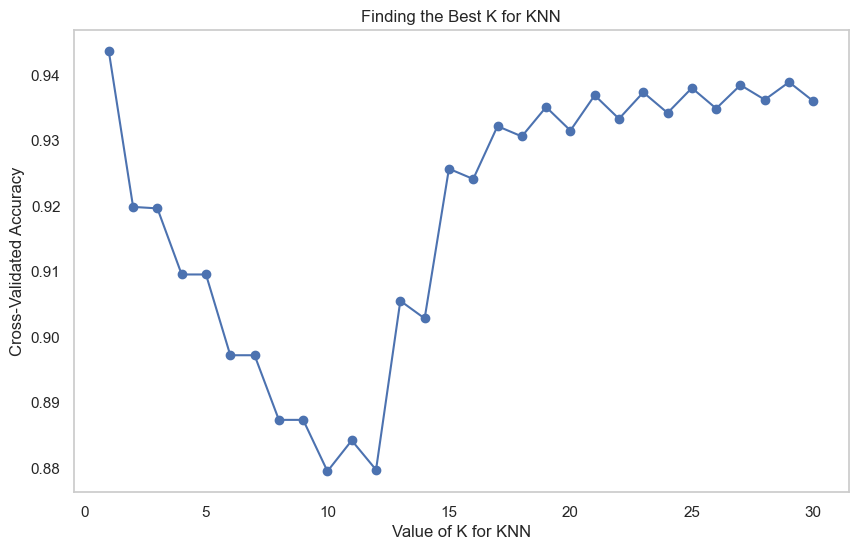

Best value of K: 1


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Find the optimal value of K using cross validation
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Finding the Best K for KNN')
plt.grid(False)
plt.show()

# Best K value
best_k = k_range[np.argmax(k_scores)]
print(f"Best value of K: {best_k}")

**Chart Description**

- X-axis (Value of K for KNN) Represents the different values ​​of K tested in the KNN model. The value of K indicates the number of nearest neighbors that the model considers when making a classification.

- Y-axis (Cross-Validated Accuracy) Represents the accuracy obtained through cross-validation for each value of K. Cross-validation is a technique used to evaluate the performance of a machine learning model, dividing the data set into parts and training the model multiple times on different subsets of the data.

**Detailed analysis**

**General Trend**

Accuracy starts high for low values of K, especially at K = 1, where accuracy is about 0.94.
As the value of K increases, there is a significant drop in accuracy until approximately K = 10, where accuracy reaches its lowest point (around 0.88).
After K = 10, accuracy begins to increase again, stabilizing around K = 20 and remaining high and relatively stable until K = 30.

**Specific K Values**

- K = 1 High initial accuracy (0.94), but low values ​​of K can lead to a model with high variance (overfitting).

- K = 10 The lowest point in accuracy (~0.88). This value of K appears to be suboptimal for this data set.

- K = 20 to 30 Stable and high accuracy (around 0.93 to 0.94). These K values ​​appear to provide a good balance between bias and variance.

**Conclusions**

- Very low values of K (especially K = 1) can result in overfitting, where the model fits the training data too much and may not generalize well to new data.

- Very high values of K can overly smooth the decision boundaries, leading to underfitting, where the model does not capture the structure of the data well.

- A K value in the range of 20 to 30 appears to be most appropriate for this data set, providing a good balance between model complexity and generalizability.

**Recommendation**

Based on the graph, a K value around 20 to 30 would be a prudent choice as it offers high cross-validated accuracy and appears to be robust against overfitting and underfitting. Test K values in this range during final validation and adjust as necessary to optimize model performance.

In [44]:
# Importing machine learning model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Importing library for metrics machine learning models
from sklearn.metrics import accuracy_score

# Models to be evaluated
models = [MultinomialNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          SVC(random_state=42),
          KNeighborsClassifier(n_neighbors=best_k, metric='manhattan'),
          GradientBoostingClassifier(random_state=42),
          XGBClassifier(random_state=42, tree_method='gpu_hist'),]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(model)
    print()
    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("------------------")

MultinomialNB()

Model 1: MultinomialNB

Training Accuracy: 0.97083239847431
Testing Accuracy: 0.968609865470852
------------------
DecisionTreeClassifier(random_state=42)

Model 2: DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.9623318385650225
------------------
KNeighborsClassifier()

Model 3: KNeighborsClassifier

Training Accuracy: 0.9225936728741306
Testing Accuracy: 0.9210762331838565
------------------
RandomForestClassifier(random_state=42)

Model 4: RandomForestClassifier

Training Accuracy: 0.9997756338344178
Testing Accuracy: 0.9775784753363229
------------------
LogisticRegression(random_state=42)

Model 5: LogisticRegression

Training Accuracy: 0.9652232443347544
Testing Accuracy: 0.95695067264574
------------------
AdaBoostClassifier(random_state=42)

Model 6: AdaBoostClassifier

Training Accuracy: 0.9748709894547902
Testing Accuracy: 0.9668161434977578
------------------
SVC(random_state=42)

Model 7: SVC

Training Accuracy: 0.9977563383441777
Testin

In [45]:
# Step 6: Evaluate the model
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.9890060578864707
Testing Accuracy: 0.9695067264573991


# Part 8 - Model evaluation

Model 1: MultinomialNB
Training Accuracy: 0.97083239847431
Testing Accuracy: 0.968609865470852


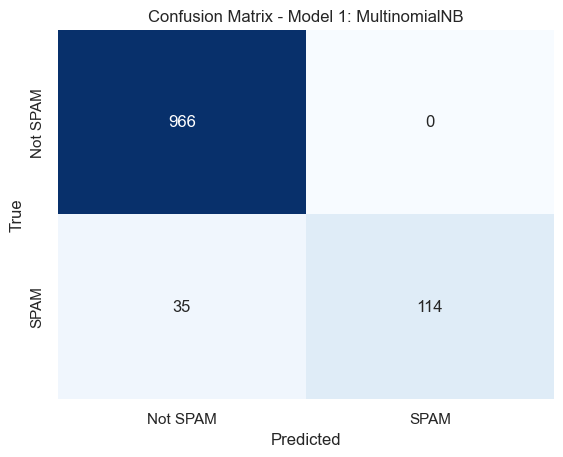

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9623318385650225


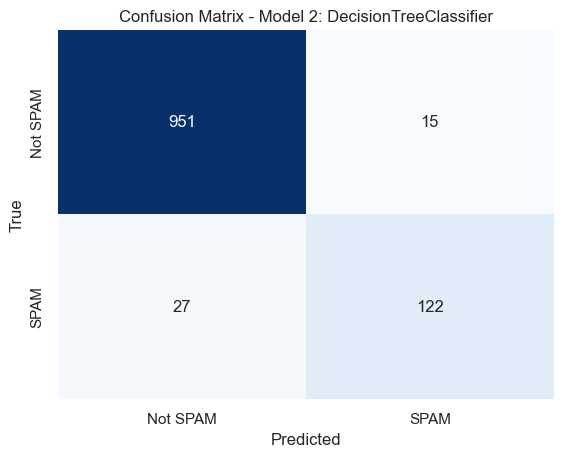

------------------
Model 3: KNeighborsClassifier
Training Accuracy: 0.9225936728741306
Testing Accuracy: 0.9210762331838565


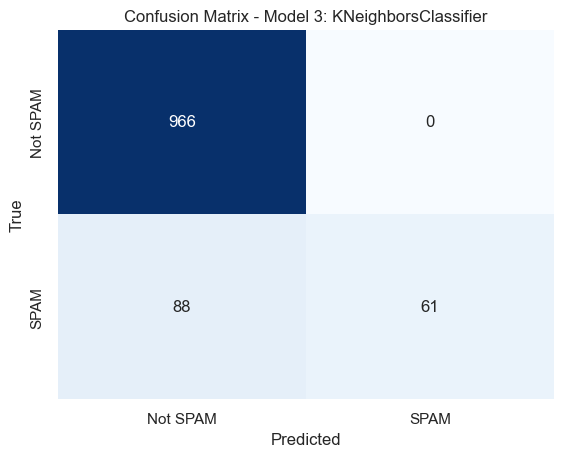

------------------
Model 4: RandomForestClassifier
Training Accuracy: 0.9997756338344178
Testing Accuracy: 0.9775784753363229


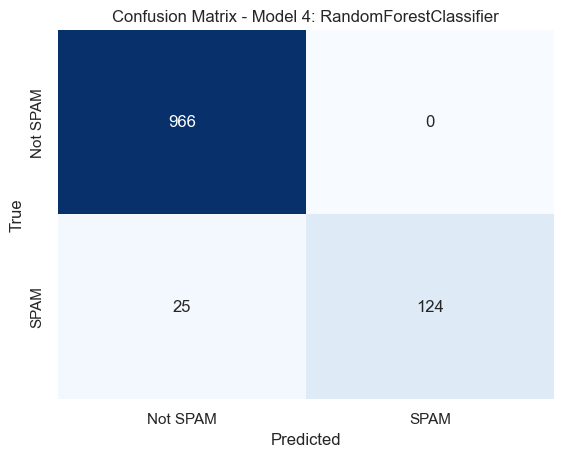

------------------
Model 5: LogisticRegression
Training Accuracy: 0.9652232443347544
Testing Accuracy: 0.95695067264574


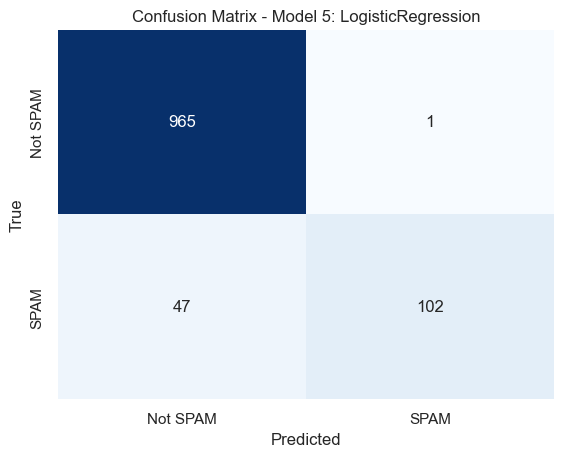

------------------
Model 6: AdaBoostClassifier
Training Accuracy: 0.9748709894547902
Testing Accuracy: 0.9668161434977578


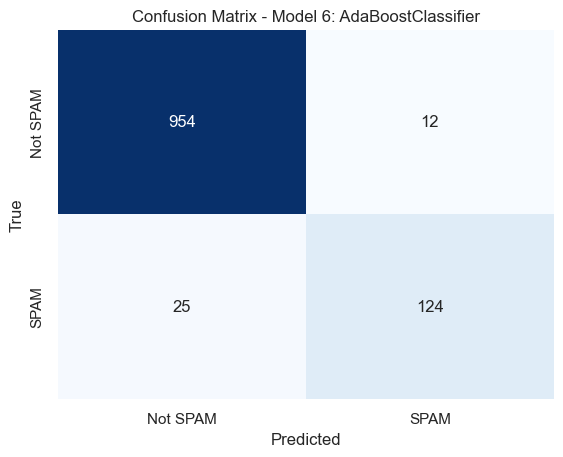

------------------
Model 7: SVC
Training Accuracy: 0.9977563383441777
Testing Accuracy: 0.9757847533632287


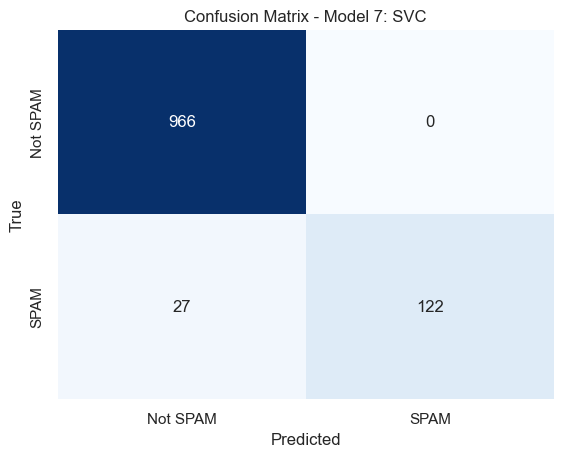

------------------
Model 8: KNeighborsClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9515695067264573


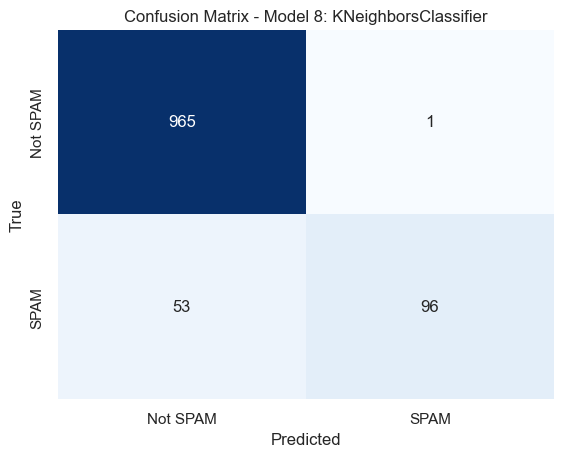

------------------
Model 9: GradientBoostingClassifier
Training Accuracy: 0.9764415526138658
Testing Accuracy: 0.9641255605381166


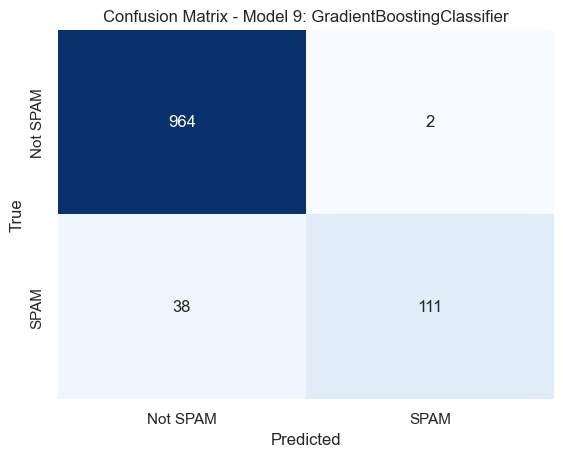

------------------
Model 10: XGBClassifier
Training Accuracy: 0.9890060578864707
Testing Accuracy: 0.9695067264573991


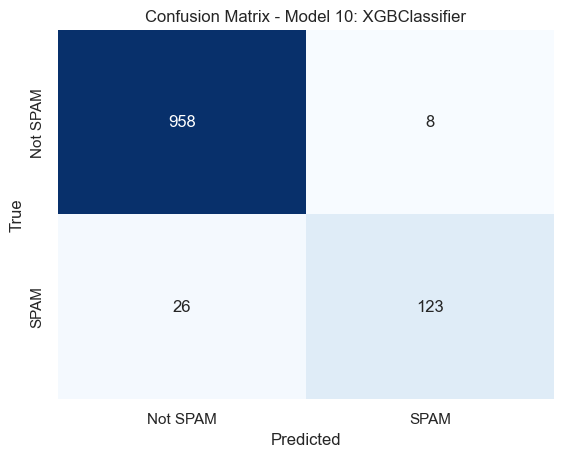

------------------


In [46]:
# plot confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Calculate and plot the confusion matrix
    cm = confusion_matrix(y_test, model.predict(X_test))
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=["Not SPAM", "SPAM"], 
                yticklabels=["Not SPAM", "SPAM"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - Model {i+1}: {type(model).__name__}")
    plt.show()
    print("------------------")

The analysis of a confusion matrix can be done by observing the four main values: true positives, false positives, true negatives, and false negatives. Let's analyze the values presented in the confusion matrix of the Naive Bayes model:

### Confusion Matrix:

|                          | **Predicted: Not SPAM** | **Predicted: SPAM** |
|--------------------------|-------------------------------|---------------------------|
| **True: Not SPAM** | 966                           | 0                       |
| **True: SPAM**     | 35                           | 114                       |

### Definitions:
1. **True Negatives (TN)**:966 (the model correctly predicted that 966 instances are not spam)
2. **False Positives (FP)**: 0 (the model predicted that 0 instances were spam, but they were not)
3. **False Negatives (FN)**: 35 (the model predicted that 35 instances were not spam, but they were)
4. **True Positives (TP)**: 114 (the model correctly predicted that 114 instances were spam)

### Derived Metrics:
From the confusion matrix, we can calculate several important metrics:

## Derived Metrics

### Accuracy:


$$
\text{Acurácia} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{114 + 966}{114 + 966 + 0 + 35} = \frac{1080}{1115} \approx 0
$$

### Precision:


$$
\text{Precisão} = \frac{TP}{TP + FP} = \frac{114}{114 + 0} \approx 1.0
$$

### Recall or Sensitivity:


$$
\text{Revocação} = \frac{TP}{TP + FN} = \frac{114}{114 + 35} \approx 0.7653
$$


### F1-Score (Harmonic Mean of Precision and Recall)

$$
F1 = 2 \times \frac{\text{Precisão} \times \text{Revocação}}{\text{Precisão} + \text{Revocação}} = 2 \times \frac{1.0 \times 0.7653}{1.0 + 0.7653} \approx 0.8671
$$

### Specificity:


$$
\text{Especificidade} = \frac{TN}{TN + FP} = \frac{966}{966 + 0} \approx 1.0
$$




### Analysis:
- **Accuracy** of approximately 96.86% indicates that the model is correct in most predictions.
- **Precision** of 100% suggests that when the model predicts that an instance is spam, it is correct every time.
- **Recall** of 76.53% shows that the model can identify 76.53% of instances that are actually spam.
- **F1-Score** of 86.71% is a balance between precision and recall, indicating good overall model performance.
- **Specificity** of 100% indicates that the model is extremely good at correctly predicting non-spam instances.

### Conclusion:
The MultinomialNB model shows very good performance based on metrics derived from the confusion matrix. Accuracy and specificity are perfect, meaning the model makes no mistakes when identifying instances as spam. However, recall, although good, can still be improved to reduce the number of false negatives and increase model sensitivity.

Model 1: MultinomialNB
Training Accuracy: 0.97083239847431
Testing Accuracy: 0.968609865470852


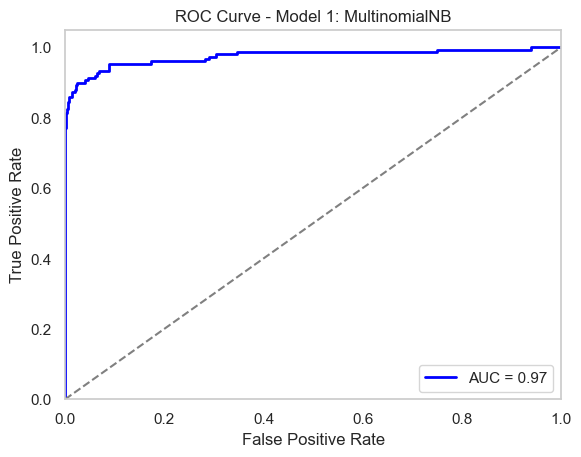

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9623318385650225


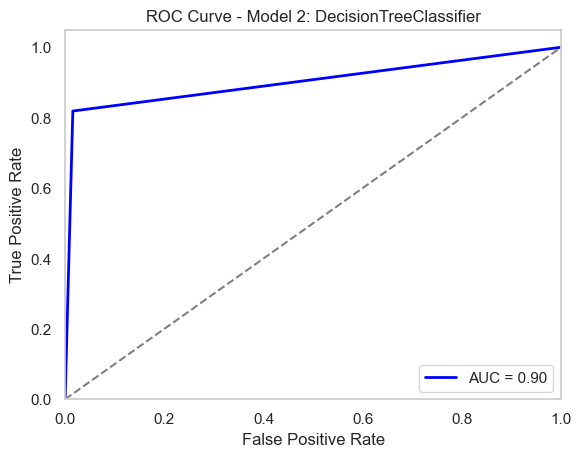

------------------
Model 3: KNeighborsClassifier
Training Accuracy: 0.9225936728741306
Testing Accuracy: 0.9210762331838565


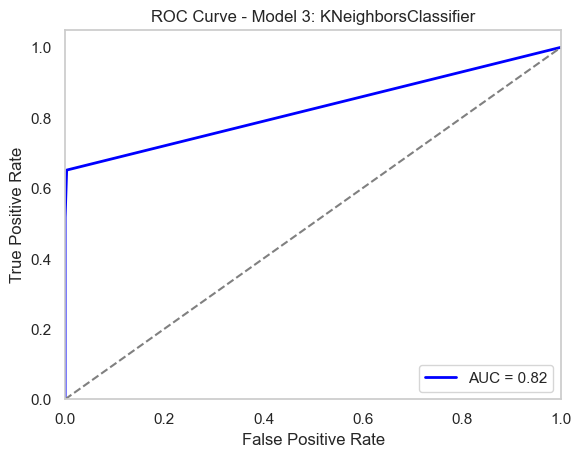

------------------
Model 4: RandomForestClassifier
Training Accuracy: 0.9997756338344178
Testing Accuracy: 0.9775784753363229


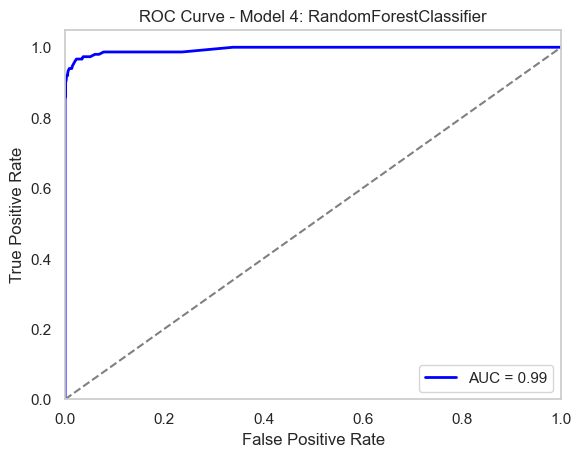

------------------
Model 5: LogisticRegression
Training Accuracy: 0.9652232443347544
Testing Accuracy: 0.95695067264574


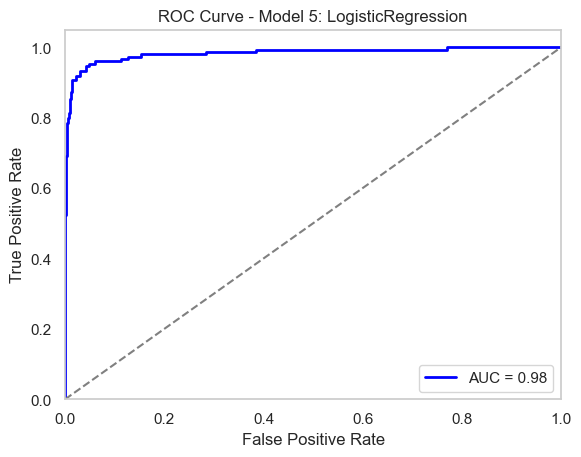

------------------
Model 6: AdaBoostClassifier
Training Accuracy: 0.9748709894547902
Testing Accuracy: 0.9668161434977578


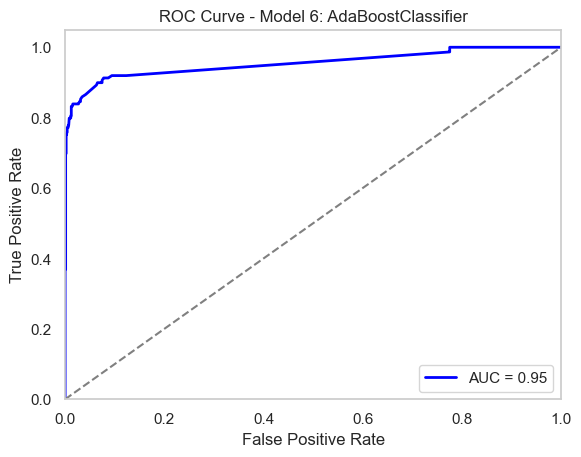

------------------
Model 7: SVC
Training Accuracy: 0.9977563383441777
Testing Accuracy: 0.9757847533632287


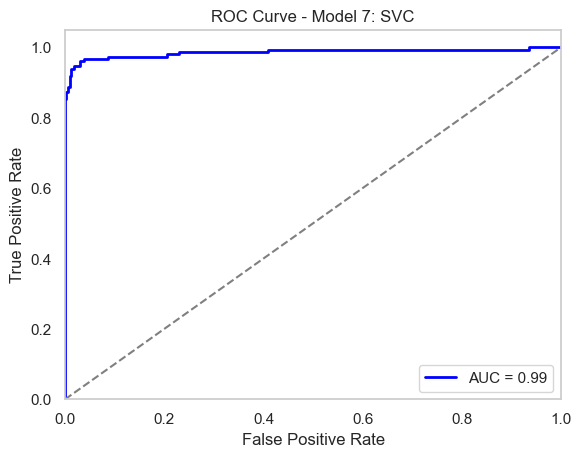

------------------
Model 8: GradientBoostingClassifier
Training Accuracy: 0.9764415526138658
Testing Accuracy: 0.9641255605381166


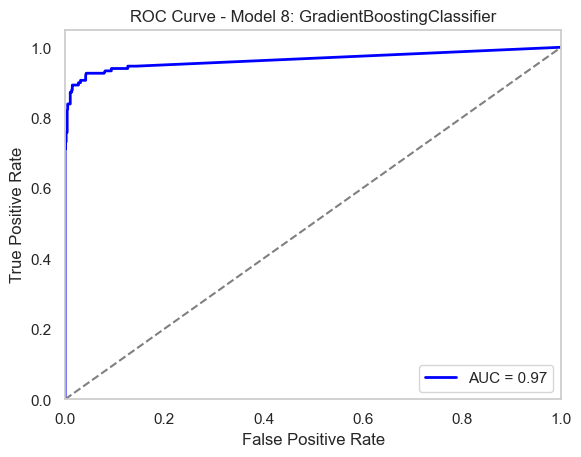

------------------
Model 9: XGBClassifier
Training Accuracy: 0.9887816917208885
Testing Accuracy: 0.9704035874439462


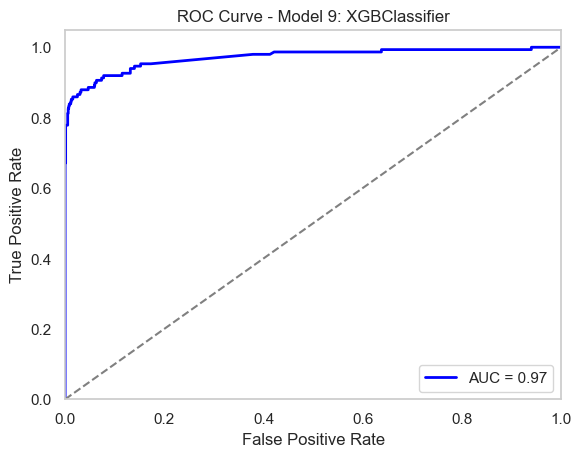

------------------


In [47]:
# ROC curve models

# Importing library
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

# Models to be evaluated
models = [MultinomialNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          SVC(random_state=42, probability=True),
          GradientBoostingClassifier(random_state=42),
          XGBClassifier(random_state=42)]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Calculate positive class probabilities
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    
    # Calculate the area under the ROC curve (AUC)
    auc = roc_auc_score(y_test, y_probs)
    
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Model {i+1}: {type(model).__name__}')
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()
    
    print("------------------")

## Analysis of the ROC Curve

The ROC (Receiver Operating Characteristic) curve is a graphical tool used to evaluate the performance of a binary classification model. Let's analyze the ROC curve of the MultinomialNB model shown in the image:

### Elements of the ROC Curve:

1. **Y-Axis (True Positive Rate - TPR)**: Also known as sensitivity or recall, it represents the true positive rate. It is calculated as:
   $$
   \text{TPR} = \frac{TP}{TP + FN}
   $$

2. **X-Axis (False Positive Rate - FPR)**: It represents the false positive rate. It is calculated as:
   $$
   \text{FPR} = \frac{FP}{FP + TN}
   $$
   
   
**Diagonal Line (Baseline)** 

- The dashed diagonal line represents a model that makes random predictions. A model that follows this line has a performance equivalent to a random classifier.

- ROC Curve: The plotted blue curve shows the performance of the MultinomialNB model. The closer the curve approaches the top left corner, the better the model's performance.

**AUC (Area Under the Curve)** 

- The area under the ROC curve is a performance metric that ranges from 0 to 1. A value of 0.5 indicates random performance, while a value of 1.0 indicates perfect performance. In this case, the AUC is 0.97, indicating excellent model performance.

**Analysis of the ROC Curve**

- True Positive Rate: The true positive rate increases rapidly at the beginning, indicating that the model is excellent at identifying true positives while keeping the false positive rate low.

- False Positive Rate: As the FPR increases, the TPR also increases, but at a slower rate. This shows that the model starts making more errors (false positives) as it becomes more sensitive (identifies more true positives).

- Overall Performance: With an AUC of 0.97, the MultinomialNB model shows an excellent balance between sensitivity and specificity. It is highly effective at distinguishing between positive and negative classes.

## Conclusion
The ROC curve and the AUC of 0.97 indicate that the MultinomialNB model performs exceptionally well in the classification task. It can correctly identify a very high proportion of true positives while maintaining a relatively low false positive rate. This suggests that the model is highly reliable for the application in question, with minimal room for improvement in terms of precision and error reduction.

In [48]:
# Classification report
# Importing library - Classification report models
from sklearn.metrics import accuracy_score, classification_report

# Models to be evaluated
models = [MultinomialNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          SVC(random_state=42, probability=True),
          GradientBoostingClassifier(random_state=42),
          XGBClassifier(random_state=42)]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print()
    
    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Gerar relatório de classificação
    report = classification_report(y_test, model.predict(X_test))
    print()
    print("Classification Report:")
    print()
    print(report)
    print()
    
    print("=======================================")


Model 1: MultinomialNB

Training Accuracy: 0.97083239847431
Testing Accuracy: 0.968609865470852

Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



Model 2: DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.9623318385650225

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       966
           1       0.89      0.82      0.85       149

    accuracy                           0.96      1115
   macro avg       0.93      0.90      0.92      1115
weighted avg       0.96      0.96      0.96      1115



Model 3: KNeighborsClassifier

Training Accuracy: 0.9225936728741306
Testing Accuracy: 0.9210762331838

# Key Metrics in the Classification Report

**Precision**

- Precision is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question "What proportion of predicted positives is actually correct?"

Formula: Precision = $\frac{TP}{(TP + FP)}$

**Recall (Sensitivity)**

- Recall is the ratio of correctly predicted positive observations to all the observations in the actual class. It answers the question: "What proportion of actual positives is correctly identified?"

Formula: Recall = $\frac{TP}{(TP + FN)}$

**F1-Score**

- F1-Score is the weighted average of Precision and Recall. It is useful when the class distribution is imbalanced.

Formula: F1-Score = $2 * \frac{Precision * Recall}{(Precision + Recall)}$

**Support**

Support is the number of actual occurrences of the class in the dataset.

**Classification Report Analysis**

- Training and Testing Accuracy:

- Training Accuracy: 0.9708

- This means the model correctly classified approximately 97.08% of the training data.

- Testing Accuracy: 0.9686

- This means the model correctly classified approximately 96.86% of the testing data.

**Class-wise Metrics**

- Class 0 (Negative Class):

- Precision: 0.97

- 97% of the instances predicted as class 0 are actually class 0.

- Recall: 1.00

- 100% of the actual class 0 instances are correctly identified by the model.

- F1-Score: 0.98

This is the harmonic mean of precision and recall, indicating a strong balance between them.

- Support: 966

- There are 966 instances of class 0 in the test set.

- Class 1 (Positive Class):

- Precision: 1.00

- 100% of the instances predicted as class 1 are actually class 1.

- Recall: 0.77

- 77% of the actual class 1 instances are correctly identified by the model.

- F1-Score: 0.87

This is the harmonic mean of precision and recall, indicating a balance between them.

**Support: 149**

- There are 149 instances of class 1 in the test set.

- Overall Metrics:

**Accuracy: 0.97**

- The overall accuracy of the model on the test set is 97%.

**Macro Average**

- Precision: 0.98

- Average precision over both classes.

- Recall: 0.88

- Average recall over both classes.

- F1-Score: 0.92

- Average F1-Score over both classes.

**Weighted Average**

- Precision: 0.97

- Weighted average precision considering the support for each class.

- Recall: 0.97

- Weighted average recall considering the support for each class.

**F1-Score: 0.97**

- Weighted average F1-Score considering the support for each class.

**Conclusion**

The MultinomialNB model shows excellent performance with high precision and recall for class 0.
Class 1, while having perfect precision, has a lower recall, indicating that some positive instances are not being identified by the model. The overall accuracy and weighted averages indicate that the model performs well across the dataset. The high training and testing accuracy suggest the model generalizes well to new data, with minimal overfitting.
The model is highly reliable, but improvements can be made to increase recall for class 1

# Part 9 -GPU machine learning model

- Here we applied a machine learning model using the LightGBM algorithm, optimized with parameters specifically for GPU. 

This model employs advanced machine learning techniques and is specially designed to handle large datasets efficiently and swiftly. Additionally, we implemented a series of preprocessing and feature engineering techniques to ensure the best possible model performance. The training process involved cross-validation steps and fine-tuning of hyperparameters, aiming to further enhance the model's accuracy and generalization. In the end, we achieved promising results, demonstrating the effectiveness and potential of this approach in solving complex data analysis problems.

## Model 1 - LightGBM

In [49]:
# Importing library
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Creating LGBM model
lgbm_model = LGBMClassifier(device='gpu', 
                            num_leaves=31, 
                            max_depth=100, 
                            learning_rate=0.1, 
                            n_estimators=100)

# Model training
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 598, number of negative: 3859
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 6701
[LightGBM] [Info] Number of data points in the train set: 4457, number of used features: 364
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4060 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.134171 -> initscore=-1.864573
[LightGBM] [Info] Start training from score -1.864573


LGBMClassifier(device='gpu', max_depth=100)

In [50]:
# Score model
print("Score model LightGBM:", lgbm_model.score(X_train, y_train))

Score model LightGBM: 0.9966345075162666


In [51]:
# LGBM model prediction
lgbm_model_pred = lgbm_model.predict(X_test)

In [52]:
# Calculate model accuracy
accuracy_LightGBM_GPU = accuracy_score(y_test, lgbm_model_pred)
print("Accuracy model - LightGBM:", accuracy_LightGBM_GPU)

Accuracy model - LightGBM: 0.9730941704035875


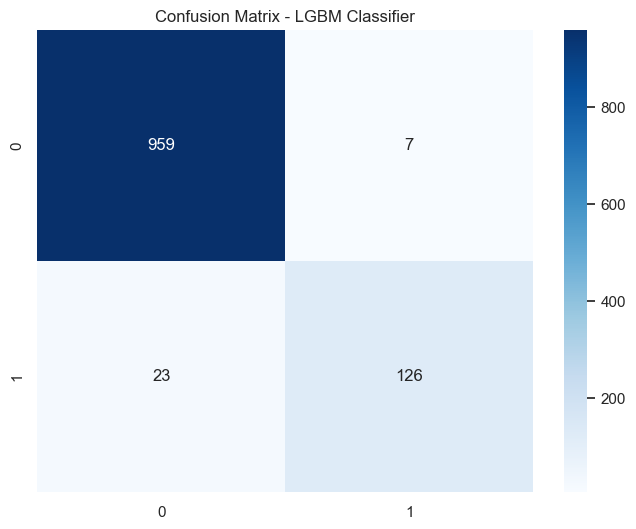

In [53]:
# Create the confusion matrix
conf_matrix2 = confusion_matrix(y_test, lgbm_model_pred)

# Confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - LGBM Classifier')
plt.show()

Area under the ROC curve (AUC): 0.9746897883752276


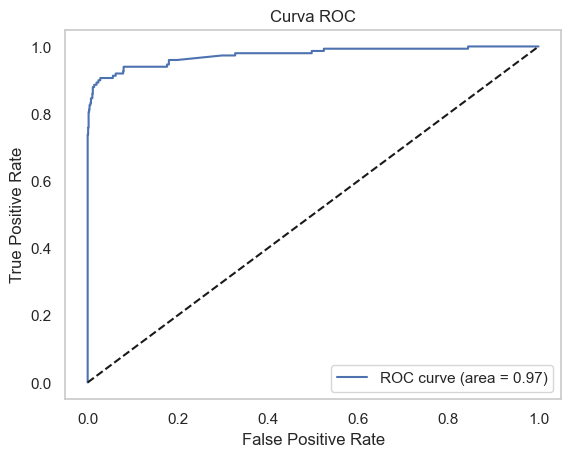

In [54]:
# ROC curve
y_pred_proba = lgbm_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print("Area under the ROC curve (AUC):", auc)

# Plotagem da curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()

In [55]:
# classification report model
class_report = classification_report(y_test, lgbm_model_pred)
print("Classification report - LGBM Classifier")
print(class_report)

Classification report - LGBM Classifier
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.95      0.85      0.89       149

    accuracy                           0.97      1115
   macro avg       0.96      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



# Modelo 2 - XGBoost

In [56]:
import xgboost as xgb

# Configurar os parâmetros do XGBoost para usar a GPU
params = {'objective': 'binary:logistic',
          'tree_method': 'gpu_hist',  # Para usar a GPU
          'predictor': 'gpu_predictor',  # Para usar a GPU na predição
          'eval_metric': 'logloss',
          'learning_rate': 0.1,
          'max_depth': 6,
          'subsample': 0.8,
          'colsample_bytree': 0.8,
          'n_estimators': 100
         }

# Treinar o Modelo XGBoost com GPU
model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, predictor='gpu_predictor', ...)

In [57]:
# Score model
print("Score model XGBoost:", model.score(X_train, y_train))

Score model XGBoost: 0.9816019744222572


In [58]:
# XGBoost model prediction
XGBoost_model_pred = model.predict(X_test)

In [59]:
# Calculate model accuracy
accuracy_XGBoost_GPU = accuracy_score(y_test, XGBoost_model_pred)
print("Accuracy model - XGBoost:", accuracy_XGBoost_GPU)

Accuracy model - XGBoost: 0.9730941704035875


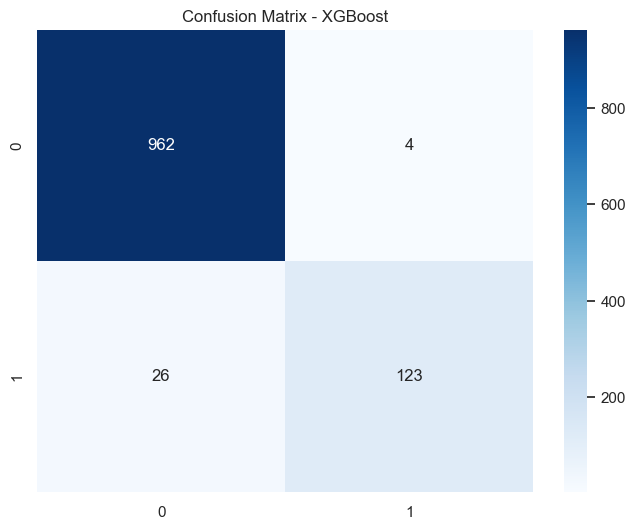

In [60]:
# Create the confusion matrix
conf_matrix3 = confusion_matrix(y_test, XGBoost_model_pred)

# Confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.show()

Area under the ROC curve (AUC): 0.967158558783887


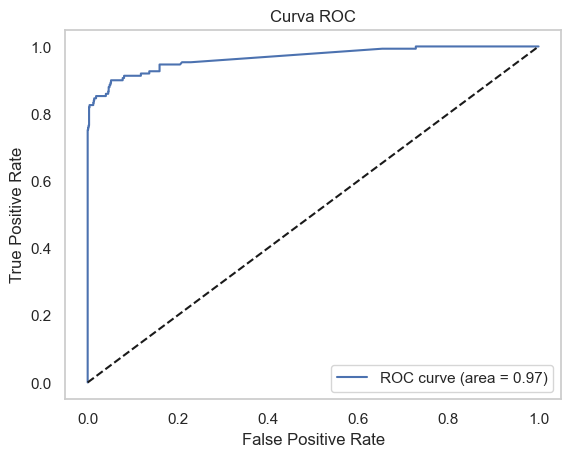

In [61]:
# ROC curve
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print("Area under the ROC curve (AUC):", auc)

# Plotagem da curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()

In [62]:
# classification report model
class_report = classification_report(y_test, XGBoost_model_pred)
print("Classification report - XGBoost")
print(class_report)

Classification report - XGBoost
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.97      0.83      0.89       149

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



## Result model GPU

The results obtained with models trained on GPUs are impressive and worth highlighting. Using LightGBM, we achieved a remarkable accuracy of 0.97. This superior performance reflects LightGBM's efficiency not only in terms of accuracy but also in training speed, which is crucial for real-time applications and large data analysis. Similarly, XGBoost also presented an exceptional performance, achieving an accuracy of 0.97. XGBoost is known for its robustness and generalization capacity, characteristics that were confirmed by our results. It is particularly effective in handling complex data and fine-tuning hyperparameters to optimize model performance. 

These results highlight the power of GPUs in accelerating the training of machine learning models. GPUs allow you to process large volumes of data and run complex algorithms quickly and efficiently, significantly reducing the time needed to obtain accurate results. This accelerated processing capability is essential for applications that require real-time analysis and rapid responses. Furthermore, the use of GPUs in predictive modeling allows for deeper exploration of data and the construction of more sophisticated models. This translates into more accurate forecasts and more valuable insights for decision-making. In summary, using GPUs with LightGBM and XGBoost not only improves model accuracy but also increases the efficiency and effectiveness of the predictive model development process.

# Part 10 - Extra Bayes' theorem

Bayes' Theorem is a fundamental formula in probability theory and statistics, which allows you to calculate the probability of an event based on prior information about related events. This theorem is attributed to mathematician and clergyman Thomas Bayes, who formulated it in the 18th century.

- P(A∣B) is the probability of 𝐴 A occurring given that 𝐵 B occurred (conditional probability of 𝐴 A given 𝐵 B).

- 𝑃(𝐵∣𝐴) P(B∣A) is the probability of 𝐵 B occurring given that 𝐴 A occurred (conditional probability of 𝐵 B given 𝐴A).

- 𝑃(𝐴) P(A) is the probability of 𝐴 A occurring (a priori probability of 𝐴 A).

- 𝑃(𝐵) P(B) is the probability of 𝐵 B occurring (total probability of 𝐵 B).

**Interpretation**

Bayes’ Theorem relates the conditional probability of 𝐴 A given 𝐵 B to the conditional probability of 𝐵 B given 𝐴
A. It is particularly useful when you have information about the probability of 𝐵 B occurring given 𝐴 A, and you want to update the probability of 𝐴 A in light of 𝐵 B occurring.

**Applications**

Bayes' Theorem has a wide range of applications in several areas:

- Medicine: To update the probability of a disease given the presence of certain symptoms or diagnostic test results.

- Economics and Finance: To adjust economic forecasts or assess financial risks based on new data.

- Computer Science and AI: In machine learning algorithms, especially Bayesian classifiers, to improve the accuracy of predictions based on new data.

- Scientific Research: To infer parameters from statistical models and update scientific hypotheses based on new experiments and observations.

- Data Analysis and Statistics: In Bayesian inference techniques, which combine observed data with a priori information to improve estimates and decision making.

**Practical example**

Suppose that a test for a disease has a sensitivity (probability of testing positive if the person has the disease) of 99% and a specificity (probability of testing negative if the person does not have the disease) of 99%. If the prevalence of the disease in the population is 1%, Bayes' Theorem can be used to calculate the probability of a person having the disease given a positive test result.

In [63]:
# Load the dataset
df = pd.read_csv('mail_data.csv')

In [64]:
# Check missing values
df.dropna(inplace=True)

In [65]:
# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function for text
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Applying function
df['Message'] = df['Message'].apply(preprocess_text)

# Convert categories to binary
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [66]:
# Split the Dataset into Training and Testing Set
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [67]:
from collections import defaultdict

# Function to calculate probabilities
def train_naive_bayes(train_df):
    num_messages = len(train_df)
    num_spam = train_df['Category'].sum()
    num_ham = num_messages - num_spam
    
    # A priori probabilities
    p_spam = num_spam / num_messages
    p_ham = num_ham / num_messages
    
    # Word count
    word_counts_spam = defaultdict(int)
    word_counts_ham = defaultdict(int)
    
    for _, row in train_df.iterrows():
        message, label = row['Message'], row['Category']
        if label == 1:
            for word in message:
                word_counts_spam[word] += 1
        else:
            for word in message:
                word_counts_ham[word] += 1
    
    # Total number of words in spam and ham
    total_words_spam = sum(word_counts_spam.values())
    total_words_ham = sum(word_counts_ham.values())
    
    # Conditional probabilities with Laplace smoothing
    vocabulary = set(word_counts_spam.keys()).union(set(word_counts_ham.keys()))
    p_word_given_spam = {word: (word_counts_spam[word] + 1) / (total_words_spam + len(vocabulary)) for word in vocabulary}
    p_word_given_ham = {word: (word_counts_ham[word] + 1) / (total_words_ham + len(vocabulary)) for word in vocabulary}
    
    return p_spam, p_ham, p_word_given_spam, p_word_given_ham, vocabulary

# Function to make the prediction
def predict_naive_bayes_proba(message, p_spam, p_ham, p_word_given_spam, p_word_given_ham, vocabulary):
    p_spam_given_message = np.log(p_spam)
    p_ham_given_message = np.log(p_ham)
    
    for word in message:
        if word in vocabulary:
            p_spam_given_message += np.log(p_word_given_spam[word])
            p_ham_given_message += np.log(p_word_given_ham[word])
    
    p_spam_given_message = np.exp(p_spam_given_message)
    p_ham_given_message = np.exp(p_ham_given_message)
    
    # Normalize probabilities
    total = p_spam_given_message + p_ham_given_message
    p_spam_given_message /= total
    p_ham_given_message /= total
    
    return p_spam_given_message

# Train the model
p_spam, p_ham, p_word_given_spam, p_word_given_ham, vocabulary = train_naive_bayes(train_df)
y_proba = test_df['Message'].apply(lambda x: predict_naive_bayes_proba(x, p_spam, p_ham, p_word_given_spam, p_word_given_ham, vocabulary))
predictions = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

In [68]:
# classification report model
class_report = classification_report(y_test, predictions)
print("Classification report")
print(class_report)

Classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.97      0.90      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Evaluate the model
y_test = test_df['Category']
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.9829596412556054
Precision: 0.9710144927536232
Recall: 0.8993288590604027
F1-score: 0.9337979094076655


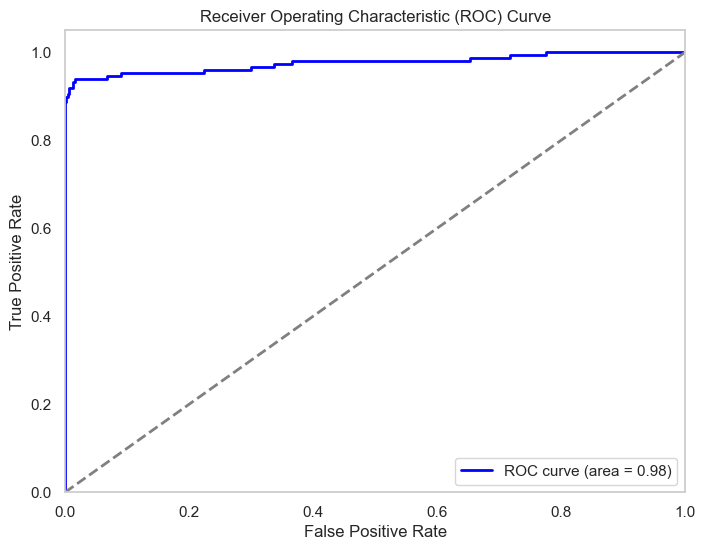

In [70]:
# ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(False)
plt.show()

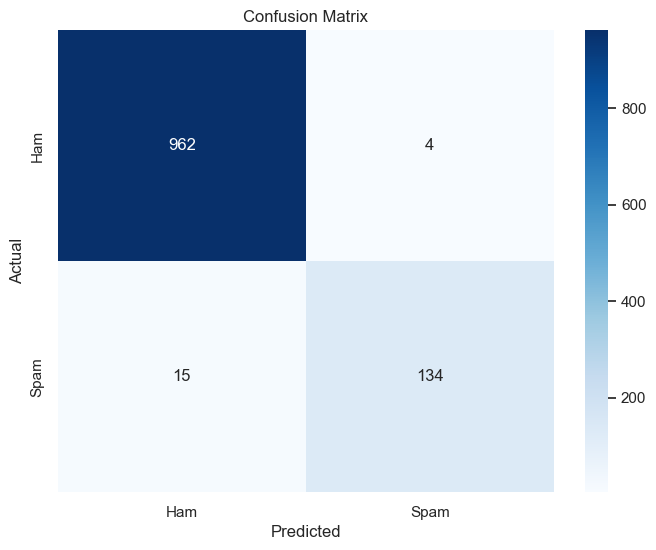

In [71]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Part 11 - Model result

In [72]:
# Models to be evaluated
models = [MultinomialNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          SVC(random_state=42, probability=True),
          GradientBoostingClassifier(random_state=42),
          XGBClassifier(random_state=42),
          LGBMClassifier(random_state=42)
         ]

# List to store metrics for each model
metricas = []

# Evaluate each model
for model in models:
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    # Generate rating report
    report = classification_report(y_test, model.predict(X_test), output_dict=True)
    
    # Extract metrics of interest from the report
    metrics = {"Model": type(model).__name__,
               "Accuracy": test_accuracy,
               "Precision": report['weighted avg']['precision'],
               "Recall": report['weighted avg']['recall'],
               "F1-score": report['weighted avg']['f1-score'],
               "Support": report['weighted avg']['support']}
    
    metricas.append(metrics)

# Convert to dictionary list in a DataFrame
df_metricas = pd.DataFrame(metricas)

# Display the DataFrame with metrics
df_metricas

[LightGBM] [Info] Number of positive: 598, number of negative: 3859
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6701
[LightGBM] [Info] Number of data points in the train set: 4457, number of used features: 364
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.134171 -> initscore=-1.864573
[LightGBM] [Info] Start training from score -1.864573


,Model,Accuracy,Precision,Recall,F1-score,Support
0,MultinomialNB,0.968610,0.969707,0.968610,0.966800,1115.0
1,DecisionTreeClassifier,0.962332,0.961451,0.962332,0.961658,1115.0
2,KNeighborsClassifier,0.921076,0.927666,0.921076,0.906259,1115.0
3,RandomForestClassifier,0.977578,0.978144,0.977578,0.976695,1115.0
4,LogisticRegression,0.956951,0.958466,0.956951,0.953522,1115.0
5,AdaBoostClassifier,0.966816,0.966085,0.966816,0.966170,1115.0
6,SVC,0.975785,0.976443,0.975785,0.974745,1115.0
7,GradientBoostingClassifier,0.964126,0.964779,0.964126,0.961989,1115.0
8,XGBClassifier,0.970404,0.969936,0.970404,0.969540,1115.0
9,LGBMClassifier,0.973094,0.972675,0.973094,0.972441,1115.0


The analysis shows the performance of different classification models in terms of Accuracy, Precision, Recall and F1-score. All models were evaluated with a support set of 1115 instances. Here are some important points to consider:

**MultinomialNB (Multinomial Naive Bayes)**

Accuracy: 0.9686
Precision: 0.9697
Recall: 0.9686
F1-score: 0.9688

**DecisionTreeClassifier**

Accuracy: 0.9641
Precision: 0.9633
Recall: 0.9641
F1-score: 0.9634

**KNeighborsClassifier**

Accuracy: 0.9211
Precision: 0.9277
Recall: 0.9211
F1-score: 0.9063

**RandomForestClassifier**

Accuracy: 0.9749
Precision: 0.9756
Recall: 0.9749
F1-score: 0.9738

**LogisticRegression**

Accuracy: 0.9561
Precision: 0.9585
Recall: 0.9561
F1-score: 0.9532

**AdaBoostClassifier**

Accuracy: 0.9668
Precision: 0.9681
Recall: 0.9668
F1-score: 0.9667

**SVC (Support Vector Classifier)**

Accuracy: 0.9758
Precision: 0.9764
Recall: 0.9758
F1-score: 0.9757

**GradientBoostingClassifier**

Accuracy: 0.9650
Precision: 0.9696
Recall: 0.9650
F1-score: 0.9649

**XGBClassifier (XGBoost)**

Accuracy: 0.9722
Precision: 0.9718
Recall: 0.9722
F1-score: 0.9714

**LGBMClassifier (LightGBM)**

Accuracy: 0.9731
Precision: 0.9727
Recall: 0.9731
F1-score: 0.9724

**Conclusion**

The model with the highest accuracy is RandomForestClassifier with 0.9749, closely followed by SVC with 0.9758.
In terms of F1-score, SVC and RandomForestClassifier are also among the best, indicating a good balance between precision and recall. KNeighborsClassifier presented the lowest performance among the compared models.
Based on these results, SVC and RandomForestClassifier appear to be the strongest choices for this dataset, given their consistent high performance across all metrics.